# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #импортируем библиотеки

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
#прочитаем csv-файл

In [3]:
data.head(10) #выводим первые 10 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [4]:
data.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

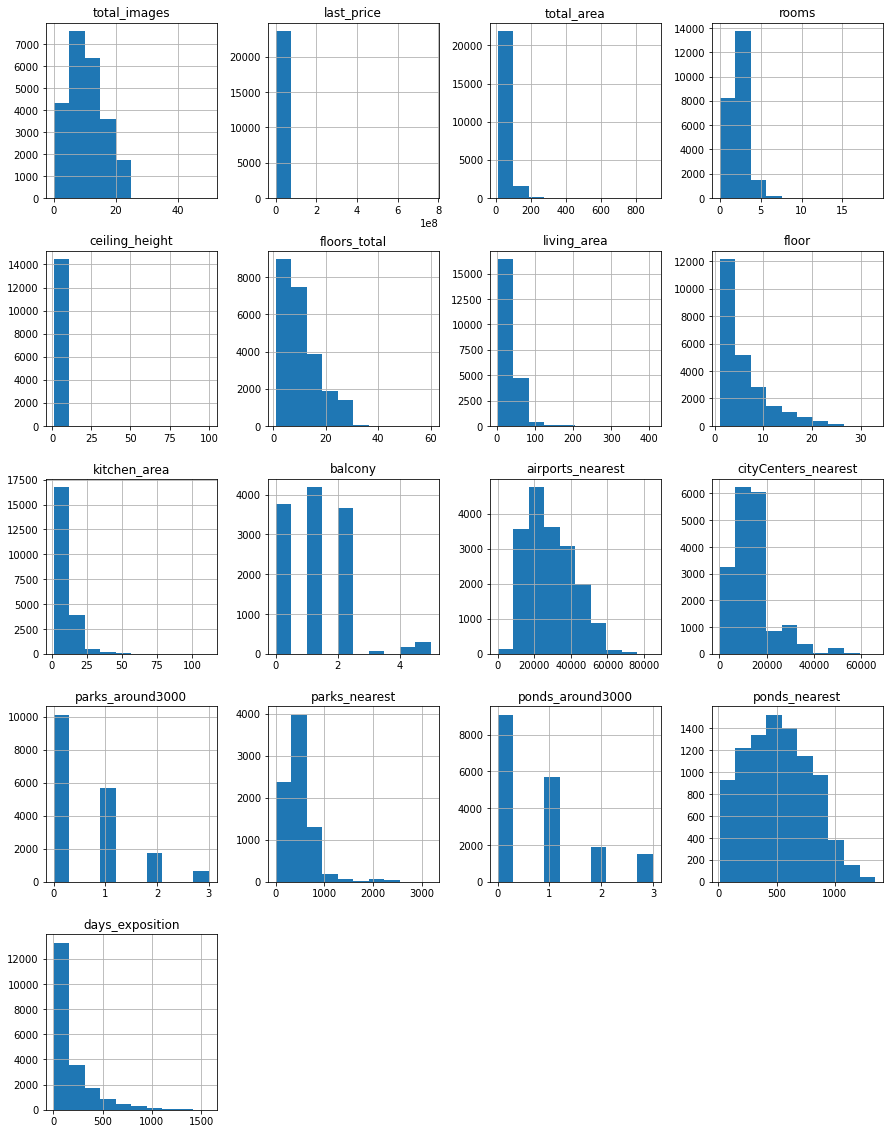

In [5]:
data.hist(figsize = (15, 20)); #построим гистограммы числовых столбцов

### Предобработка данных

In [6]:
data.isna().sum() #посмотрим количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения присутствуют в:  

- высота потолков<br>
9195 пропусков, данные этого столбца не так важны для нашего исследования, пропуски заполним медианным значением.<br>
<br>
- всего этажей в доме<br>
Пропусков 86, удалим их. <br>
<br>
- жилая площадь в квадратных метрах<br>
1903 пропусков, возможно, пользователи не помнят площадь и потому не указали. Заполним пропуски средним значением.<br>
<br>
- апартаменты<br>
Наибольшее количество пропусков 20924 в этом столбце, вероятно, пользователи не указывали тип недвижимости, если он просто жилой. Пропуски можем заменить на False - булев тип данных.<br>
<br>
- площадь кухни<br>
2278 пропусков, возможно, пользователи не знают метраж кухни и потому не указали его или это большая кухня-гостиная. Заполним пропуски средним значением.<br>
<br>
- число балконов<br>
11519 пропусков, при отсутствии балконом пользователи могли их не указать. Заполним пропуски 0. <br>
<br>
- название населённого пункта<br>
49 пропусков, удалим их. <br>
<br>
- расстояние до ближайшего аэропорта в метрах (м)<br>
5542 пропусков, возможно, отсутствует информация по удаленности аэропорта, пропуски оставим. <br>
<br>
- расстояние до центра города (м)<br>
5519 пропусков, возможно, отсутствует информация по удаленности от центра города.
Пропуски оставим, на исследование не повлияют. <br>
<br> 
- число парков в радиусе 3 км <br>
5518 пропусков, такое же количество пропусков в столбце "число водоёмов в радиусе 3 км". Вероятно, для этих объктов не была получена информация по геосервисам. Пропуски осталяем.<br>
<br>
- расстояние до ближайшего парка (м)<br>
15620 пропусков, большая часть объявлений не содержит информации о ближайших парках.
Пропуски в столбе оставляем, на исследование не повлияют. <br>
<br>
- число водоёмов в радиусе 3 км<br>
5518 пропусков, такое же количество пропусков в столбце "число парков в радиусе 3 км". Вероятно, для этих объектов не была получена информация по геосерисам. Пропуски осталяем.<br>
<br>
- расстояние до ближайшего водоёма (м)<br>
14589 пропусков, большая часть объявлений не содержит информации о ближайших водоемах.
Пропуски в столбе оставляем, на исследование не повлияют. <br>
<br>
- сколько дней было размещено объявление (от публикации до снятия)<br>
3181 пропусков, больше 13% объявлений от общего числа. Вероятно, произошла техническая ошибка при сборе или выгрузки данных, эта информация отображается автоматически.
Пропуски оставляем, заполнять их не будем, на исследование не повлияют. <br>
<br>


**Заполним пропуски и заменим тип данных в необходимых для исследования столбцах** 

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#заменим формат даты с текстового

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
#заполним пропуски в столбце на False и изменим тип данных

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
#заполним пропуски в столбце на 0, изменим тип данных на целые числа

In [10]:
data = data.dropna(subset=['floors_total']) #удалим объявления с пропусками в количестве этажей в здании

In [11]:
data = data.dropna(subset=['locality_name']) #удалим объявления с пропусками в названии населенного пункта

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
#заполним пропуски в высоте потолков медианой

In [13]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True) 
# заполним пропуски в значениях площади кухни

In [14]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
# заполним пропуски в значениях жилой площади

In [15]:
data.isna().sum() #проверим заполнение пропусков в высоте потолков, площадях жилой и кухни

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [16]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
#переименуем столбец на snake_case

In [17]:
data.info() 
#проверим внесенные изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Найдем уникальные значения среди названий населенных пунктов

In [18]:
data['locality_name'].sort_values(ascending = True).unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
#избавимся от дубликатов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'коттеджный поселок', 
              'поселок городского типа', 'поселок станции', 
              'поселок при железнодорожной станции', 'поселок имени'], 'поселок', regex=True)
)

In [20]:
data['locality_name'].sort_values(ascending = True).unique() #проверим

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px">
Были заполнены пропуски, изменены типы данных,обработаны дубликаты.
Отсутствует серьезный объем данных, следует сообщить коллегам и уточнить информацию.

### Добавление в таблицу новых столбцов

**Цена одного квадратного метра**

In [21]:
#добавим столбец с ценой одного квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(2)

In [22]:
data.price_per_meter.describe() #посмотрим статистику стоимости квадратного метра

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118300e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

**Дата публикации объявления**

In [23]:
#добавим столбцы с днем недели, месяцем и годом, в которые было опубликовано объявление
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [24]:
data.head() #проверим добавление столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.816648,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


**Тип этажа квартиры**

In [25]:
#напишем функцию категоризации по этажам
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_id'] = data.apply(floor, axis=1)

**Расстояние до центра города в км**

In [26]:
#переведем расстояние до цетра города из метров в километры
data['city_centers_nearest'] = round(data['city_centers_nearest'] / 1000)

In [27]:
#проверим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,week_day,month,year,floor_id
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.816648,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


### Исследовательский анализ данных

**Посмотрим следующие параметры**

***Общая площадь***

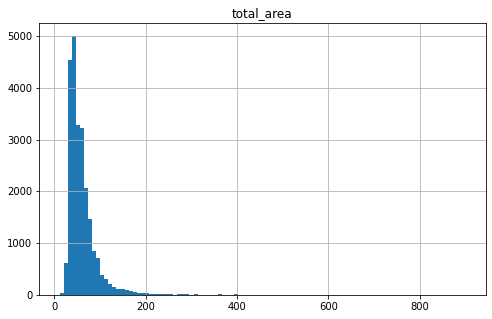

In [28]:
data.hist('total_area', bins=100, figsize = (8, 5)); #анализ общей площади

Будем учитывать значения от 20 до 100 кв. метров для более точного анализа

In [29]:
df = data.query('total_area >= 20 & total_area <= 100')

Диаграмма размаха площади после отсечения выбивающихся значений


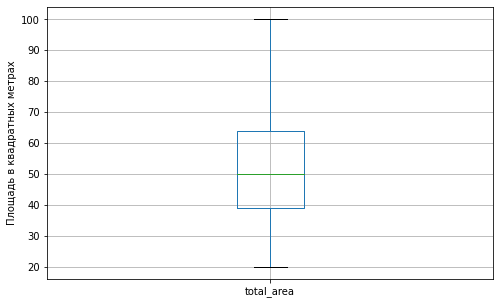

In [30]:
print('Диаграмма размаха площади после отсечения выбивающихся значений')
df.boxplot(column=['total_area'], figsize=(8,5), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

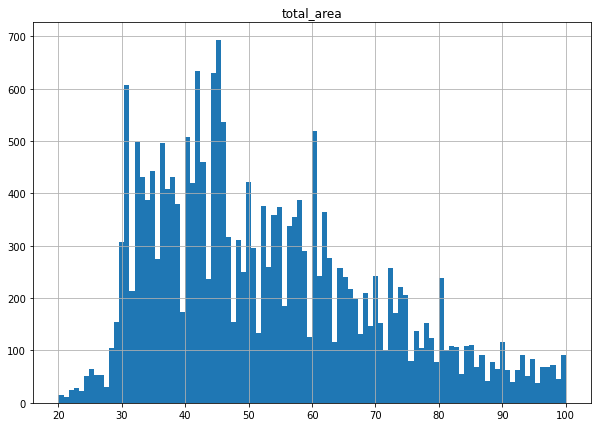

In [31]:
df.hist('total_area', bins=100, figsize=(10,7));

**Наибольшее количество квартир общей площадью около 45 кв.м., затем следуют 30 и 60. Заметна плотность в объявлениях о продаже квартир площадью от 30 до 60 кв.м.**

----

***Жилая площадь***

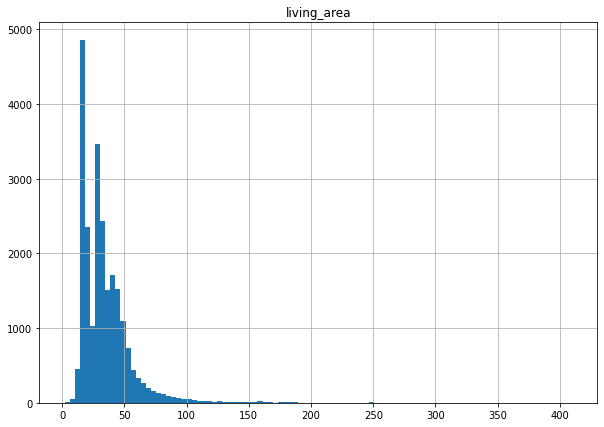

In [32]:
data.hist('living_area', bins=100, figsize = (10, 7)); #анализ общей площади

Будем учитывать значения от 10 до 60 кв. метров для более точного анализа

In [33]:
df = data.query('living_area >= 10 & total_area <= 60')

Диаграмма размаха площади после отсечения выбивающихся значений


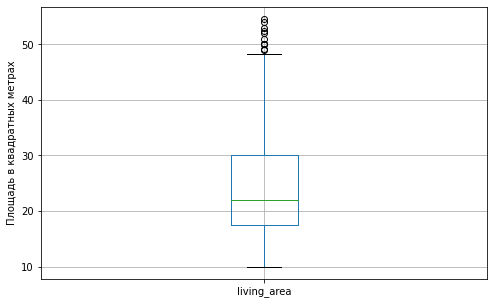

In [34]:
print('Диаграмма размаха площади после отсечения выбивающихся значений')
df.boxplot(column=['living_area'], figsize=(8,5), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

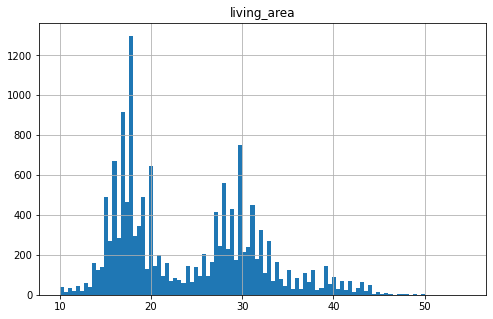

In [35]:
df.hist('living_area', bins=100, figsize=(8,5));

На графике выделяются 2 значения:
- рост от 15 до 20 кв. метров с пиковым значением в 18 метров и дальнейшим снижением
- от 27 до 32 кв. метров с пиковым значение 30 метров


**Наибольшее количество квартир с жилой площадью около 18 и 30 кв.м.**

----

***Площадь кухни***

In [36]:
data.kitchen_area.describe() #посмотрим на общие данные по площади кухни в объявлениях

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

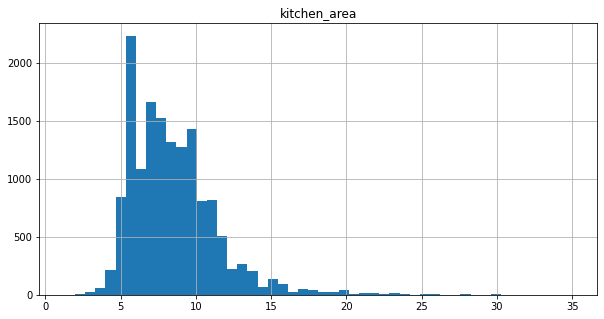

In [37]:
df.hist('kitchen_area', bins= 50, figsize=(10,5));

**Чаще всего встречаются объявления о продаже квартир с площадью кухни 6 кв.м., далее следует снижение до 12 кв.м.**

----

***Цена объекта***

In [38]:
data.last_price.describe() #посмотрим на общие данные стоимости квартир в объявлениях

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [39]:
df= df.query('last_price <= 9000000') #выборка до 9 млн.

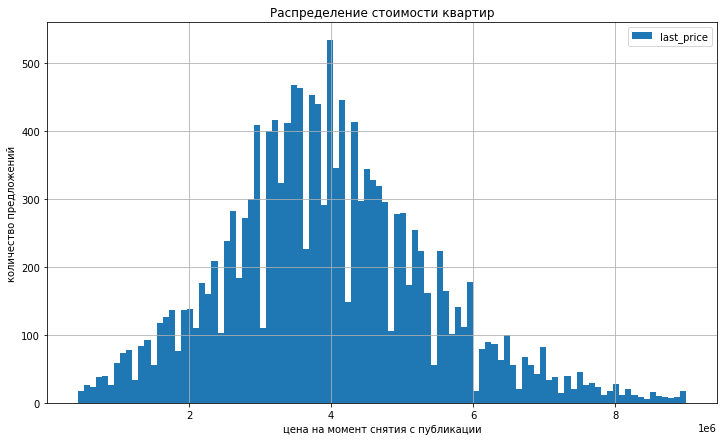

In [40]:
df.plot(kind='hist', y='last_price', title='Распределение стоимости квартир',grid=True, bins=100, figsize=(12,7))
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

**Больше всего предложений стоимостью 4 млн. рублей**

----

***Количество комнат***

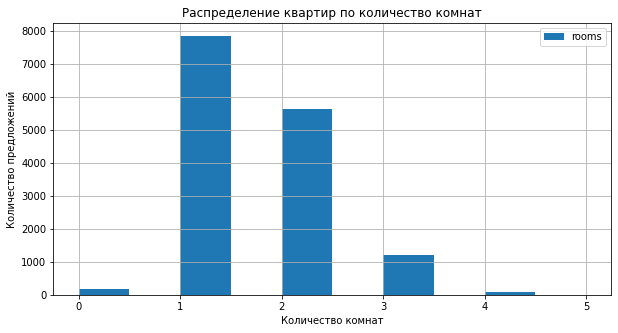

In [41]:
df.plot(kind='hist',y='rooms',title='Распределение квартир по количество комнат',grid=True, bins=10, figsize=(10,5))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

**Наиболее часто покупают квартиры с 1 комнатой, далее следуют с 2 комнатами, затем с 3, студии и квартиры с 4 комнатами. Все очень логично.**

----

***Высота потолков***

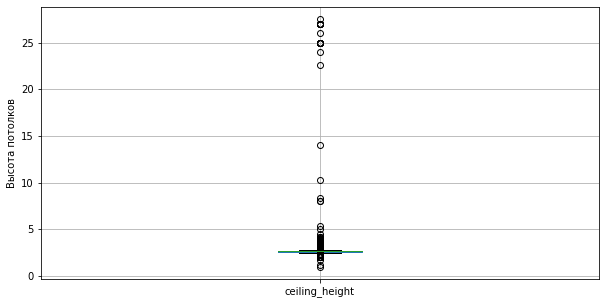

In [42]:
df.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков')
plt.show()

In [43]:
df= df.query('ceiling_height > 2.4 & ceiling_height < 4') #рассмотрим потолки высотой от 2,4 до 4 метров

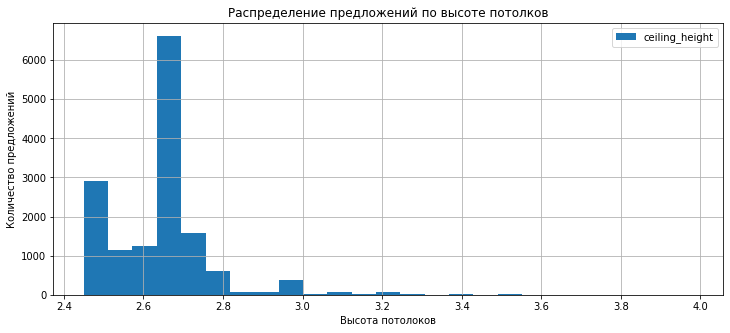

In [44]:
df.plot(kind='hist',y='ceiling_height',grid=True, bins=25, figsize=(12,5), \
        title='Распределение предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

**Больше всего объявлений о продаже квартир с высотой потолков 2,65 метра**

----

**Тип этажа квартиры («первый», «последний», «другой»)**

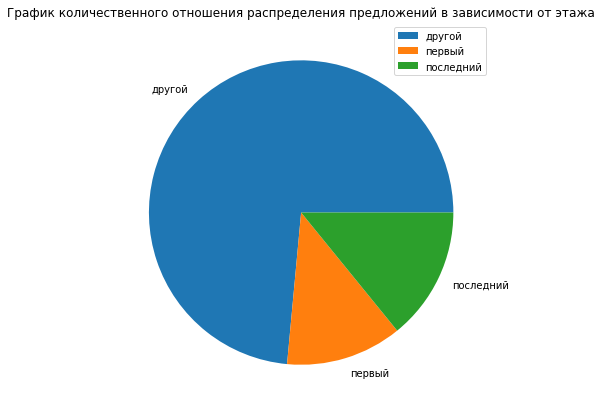

In [45]:
data.pivot_table(index='floor_id',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='График количественного отношения распределения предложений в зависимости от этажа')
plt.show()

****

**Объявлений о продаже квартир на последнем этаже немного больше, чем на первом. Посмотрим этажи в параметре "другой".**

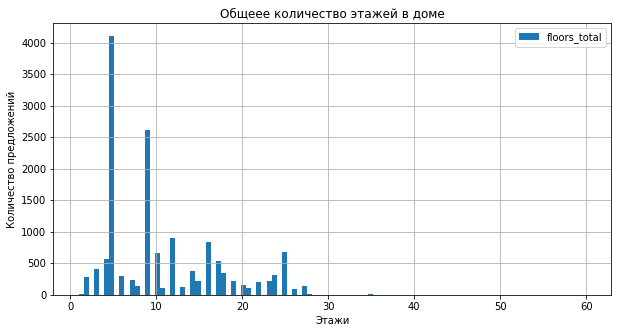

In [46]:
df.plot(kind='hist',y='floors_total',grid=True, bins=100, figsize=(10,5), \
        title='Общеее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество предложений')
plt.show()

**Чаще всего встречаются объявления о продаже в домах этажностью 5 и 9.**

----

***Расстояние до центра города***

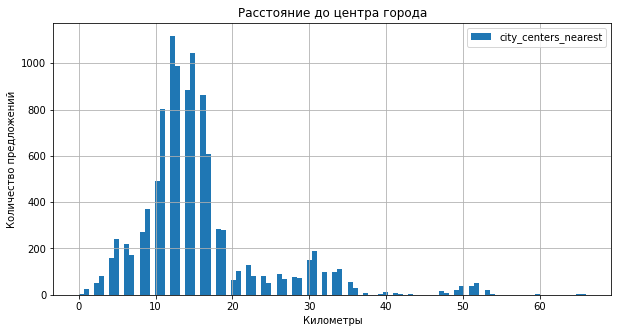

In [47]:
df.plot(kind='hist',y='city_centers_nearest',grid=True, bins=100, figsize=(10,5), \
        title='Расстояние до центра города')
plt.xlabel('Километры')
plt.ylabel('Количество предложений')
plt.show()

**Эта информация не указана почти в четверти объявлений, по имеющимся данным можем сказать, что чаще всего продаются квартиры в 10-17 км от центра города.**

----

***Расстояние до ближайшего парка***

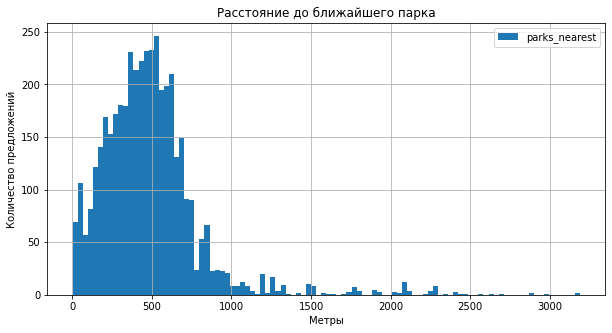

In [48]:
df.plot(kind='hist',y='parks_nearest',grid=True, bins=100, figsize=(10,5), \
        title='Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество предложений')
plt.show()

**Только у трети объявлений заполнена информация, у большой части парки находятся в шаговой доступности.**

----

***Как быстро продавались квартиры***

In [49]:
data['days_exposition'].describe() #посмотрим общую информацию по столбцу

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

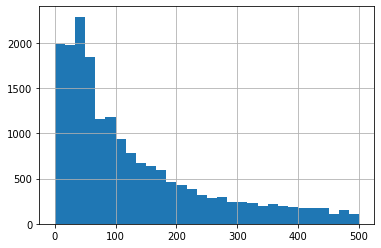

In [50]:
data['days_exposition'].hist(bins=30,range=(0,500));

In [51]:
# Средний срок
print('Средний срок продажи квартиры:', data['days_exposition'].mean())
# Медианный срок
print('Медианный срок продажи квартиры:', data['days_exposition'].median())

Средний срок продажи квартиры: 180.7413945278023
Медианный срок продажи квартиры: 95.0


**В среднем квартиру продают за 6 месяцев, самый быстрый срок продажи 45 дней, а медиана равна 95 дням. Есть варианты со сроком более 1 года, их можем назвать необычайно долгими продажами.**

----

***Факторы, которые больше всего влияют на общую (полную) стоимость объекта.***

 **- Общая площадь**

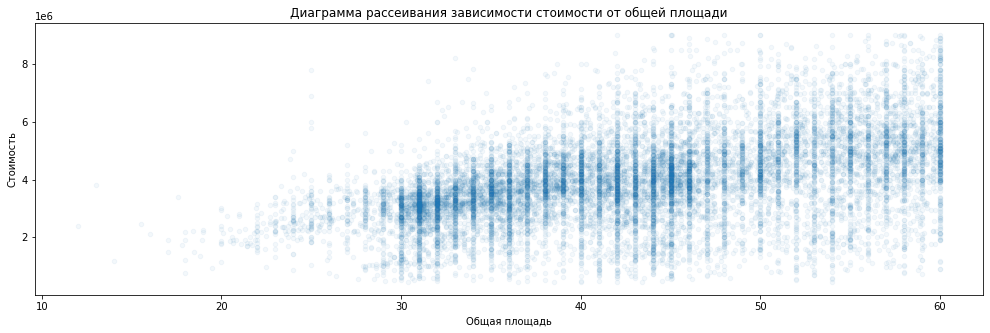

In [52]:
df.plot(x='total_area', y='last_price', 
            kind ='scatter', alpha = 0.05, figsize=(17,5),
        title='Диаграмма рассеивания зависимости стоимости от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость')
plt.show() #построим диаграмму рассеивания 

In [53]:
data['total_area'].corr(data['last_price']) #посмотрим корреляцию

0.6536213939252808

**На графике видим взаимосвязь стоимости и площади квартиры. Чем больше площадь, тем больше стоимость. Стоимость квартиры коррелирует с площадью на коэфф Пирсона 0.65, это достаточно высокая положительная корреляция.**

----

**- Жилая площадь**

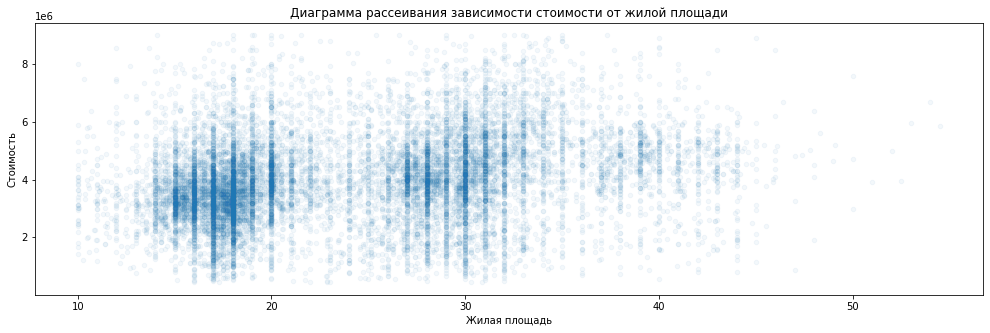

In [54]:
df.plot(x='living_area', y='last_price', 
            kind ='scatter', alpha = 0.05, figsize=(17,5),
        title='Диаграмма рассеивания зависимости стоимости от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.show() #построим диаграмму рассеивания 

In [55]:
data['living_area'].corr(data['last_price']) #посмотрим корреляцию

0.5856800396382067

**На графике видим взаимосвязь стоимости и жилой площади квартиры. Чем больше жилая площадь, тем больше стоимость. Стоимость квартиры коррелирует с жилой площадью на коэфф Пирсона 0.58, это положительная корреляция.**

----

***Площадь кухни***

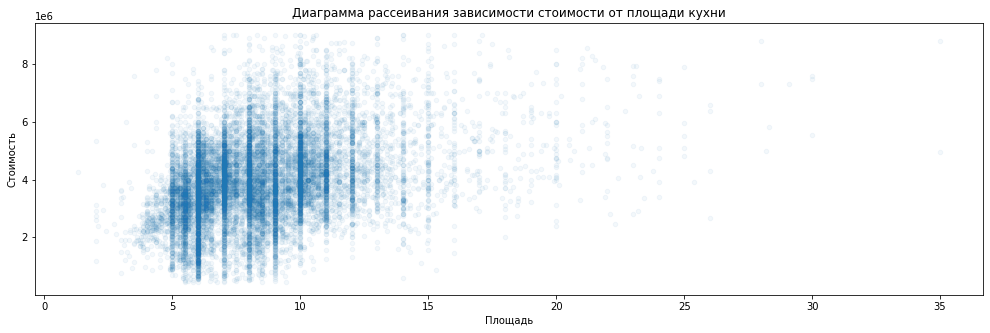

In [56]:
df.plot(x='kitchen_area', y='last_price', 
            kind ='scatter', alpha = 0.05, figsize=(17,5),
        title='Диаграмма рассеивания зависимости стоимости от площади кухни')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show() #построим диаграмму рассеивания 

In [57]:
data['kitchen_area'].corr(data['last_price']) #посмотрим корреляцию

0.5145308032223361

**Здесь предположим, что площадь кухни все же зависит от общей площади квартиры, этот параметр напрямую на стоимость квартиры не влияет.**

----

***Количество комнат***

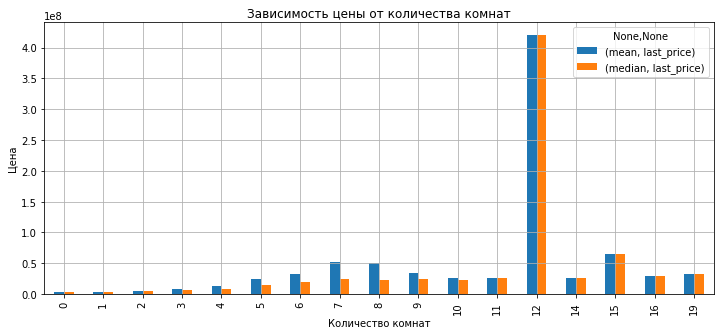

In [58]:
data.pivot_table(index=['rooms'], values='last_price', aggfunc=['mean', 'median']) \
          .plot(kind='bar', grid=True,figsize=(12,5), title='Зависимость цены от количества комнат')

plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show() #построим график по сводной таблице

In [59]:
data['last_price'].corr(data['rooms']) #посмотрим корреляцию

0.3631905485065751

**Стоимость увеличивается с числом комнат. Коэф Пирсона 0.36, положительная корреляция.**

----

***Этаж, на котором расположена квартира (первый, последний, другой)***

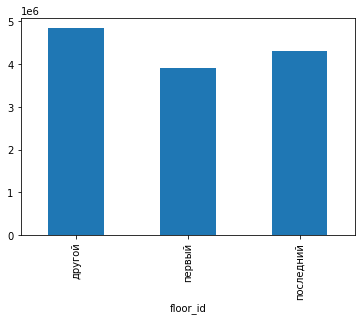

In [60]:
data.groupby('floor_id')['last_price'].median().plot(kind = 'bar')
plt.show() #построим график по этажам

**Видим, что квартиры на первом этаже продают по меньшей стоимости затем следует последний этаж. Дороже стоимость квартир от второго и до предпоследнего этажа включительно.**

----

 ***Дата размещения (день недели, месяц, год)***

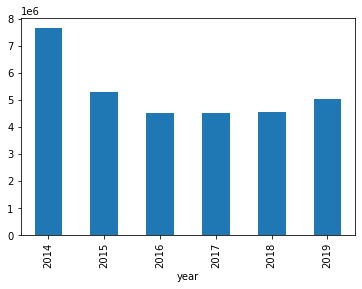

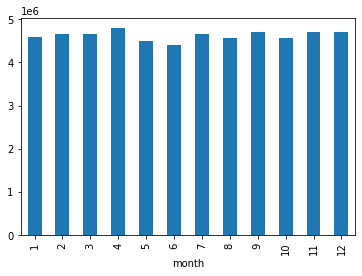

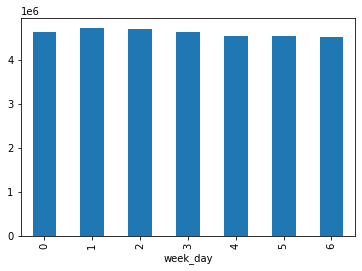

In [61]:
publication_data = data.pivot_table(index = ['week_day', 'month', 'year'] , values = ['last_price'], aggfunc = ['median']).round()
#сводная таблица даты публикаций и медианного значения цены

data.groupby('year')['last_price'].median().plot(kind = 'bar')
plt.show() #график по годам публикаций

data.groupby('month')['last_price'].median().plot(kind = 'bar')
plt.show() #график по месяцам публикаций

data.groupby('week_day')['last_price'].median().plot(kind = 'bar')
plt.show() #график по дням публикаций

**Квартиры по максимальной стоимости продавали в 2014 году, в 2015 резкое снижение, рост с 2019 года.
Объявления, опубликованные в мае и июне имеют стоимость ниже, но не намного. 
Если рассматривать дни недели, то зависимости не наблюдаем.**

----

***Cредняя цена одного квадратного метра в 10 населённых пунктах***

In [62]:
raiting_of_location=data.pivot_table(index='locality_name',values='price_per_meter',aggfunc=('count','mean'))
#сводная таблица по городу и стоимости квадратного метра
raiting_of_location.sort_values(by='count',ascending=False).head(10) #сортировка по количеству объявлений

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877339
поселок Мурино,552,85629.568641
поселок Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


**Самая высокая стоимость квадратного метра в Санкт-Петербурге, это ожидаемо. 
В Выборге недвижимость стоит дешевле всего из нашего списка 10 населённых пунктов с наибольшим числом объявлений.** 

----

***Средняя стоимость на разном удалении от центра***

,price_per_meter
city_centers_nearest,
0.0,245833.530370
1.0,177005.407604
2.0,157849.007290
3.0,121507.831638
4.0,133282.874738
5.0,140453.957005
6.0,151012.193673
7.0,156176.879524
8.0,125649.733148


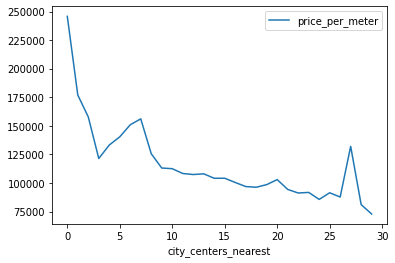

In [63]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest!=30').pivot_table(index = 'city_centers_nearest', values = 'price_per_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

**По удаленности от центра наблюдаем снижение стоимости квадратного метра после 7 км.**

----

### Общий вывод

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
     При обработке данных:
<br/>- заменили типы данных на необходимые для удобной работы, заполнили пропуски, обработали дубликаты
<br/>- на основе даты публикации объявления добавили столбцы с днем недели, месяцем и годом
<br/>- добавили столбец со стоимостью квадратного метра
<div>

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
После анализа данных выявили, что наибольшее количество проданных квартир общей площадью около 45 кв.м., затем следуют 30 и 60. Заметна плотность в объявлениях о продаже квартир площадью от 30 до 60 кв.м.<br>
    
Если рассматривать жилую площадь, то заметны 2 пика - 18 и 30 кв.м.<br>

Наиболее часто встречаются объявления о продаже квартир с площадью кухни 6 кв.м., далее следует снижение до 12 кв.м.<br>

Больше всего объявлений о продаже квартир с высотой потолков 2,65 метра.<br>

Чаще покупали квартиры стоимостью 4 млн. рублей, если говорить о планировке, то самый популярный вариант с 1 комнатой, далее следуют квартиры с 2 комнатами.<br>

Объявлений о продаже квартир на последнем этаже немного больше, чем на первом. Популярны квартиры в домах этажностью 5 и 9.<br>

По имеющимся данным можем сказать, что чаще продаются квартиры в 10-17 км от в центра города.<br>

В среднем квартиру продают за 6 месяцев, самый быстрый срок продажи 45 дней, а медиана равна 95 дням. Есть варианты со сроком более 1 года, их можем назвать необычайно долгими продажами.
   

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
На стоимость квартиры в большую сторону влияют площадь, число комнат, этаж от 2 до предпоследнего, близость к центру города.<br>

На графиках видна взаимосвязь стоимости и площади квартиры. Предположим, что площадь кухни все же зависит от общей площади квартиры, этот параметр напрямую на стоимость квартиры не влияет.
Стоимость увеличивается с числом комнат.<br>

Видим, что квартиры на первом этаже продают по меньшей стоимости, затем следует последний этаж. Дороже стоимость квартир от второго и до предпоследнего этажа включительно. <br>
    
Квартиры по максимальной стоимости продавали в 2014 году, в 2015 резкое снижение, рост с 2019 года. 
Объявления, опубликованные в мае и июне имеют стоимость немного ниже, по сравнению с другими месяцами.
Если рассматривать дни недели, то зависимости не наблюдаем.<br>
    
Квартиры дороже в Санкт-Петербурге, это ожидаемо. 
В Выборге недвижимость стоит дешевле всего из нашего списка 10 населённых пунктов с наибольшим числом объявлений.
<br> 
    
По данным удаленности по каждому километру от центра и графику наблюдаем снижение стоимости квадратного метра после 7 км.<br>
    
<br>   
Дополнительно могли бы:<br> 
- рассмотреть зависимость стоимости недвижимости от высоты потолков<br>
- посчитать процент объявлений с количеством комнат больше 5<br>
- вывести медианную стоимость квадратного метра для каждого типа неджвижимости и их долю от общего количетсва объявлений (студия, апартаменты, квартира, бизнес и премиум классы, коммунальная квартира)<br>
- проанализировать наиболее частый вариант к продаже в центре и на окраине Санкт-Петербурга<br>
<div>